## Exercise 1:

1. Describe in your own words the learning and classification process of decision trees.

- Choose random variable
- Choose random split,
- calculate informationgain
- compare with other random splits
- go until max. Depth is reached or the leafes are pur/not splittable

2. Which form should a decision tree have? As broad as possible, or as deep as possible? Why?

* It should rather be as broad as possible

 # Exercise 2.
 Ahospital introduces a software to support diagnosing patients. For that purpose, data on ill and
 healthy patients have been collected. Use the data to create a decision tree that predicts a patients
 health status based on their heart rate and blood pressure. Use information Gain

In [60]:
import math

Root: 8 Samples, 4 ill, 4 healthy

In [61]:
entropy_start=-( 4/8*math.log(4/8,2) + 4/8*math.log(4/8,2) )
entropy_start

1.0

Split with Heartrate: irregular: 3 ill, 0 healthy

In [62]:
entropy_heart_irr=-( 3/3*math.log(3/3,2) + 0/3*math.log(0.000000000000000001/3,2) )
entropy_heart_irr

-0.0

Regular: 1 ill, 4 health

In [63]:
entropy_heart_reg=-( 4/5*math.log(4/5,2) + 1/5*math.log(1/5,2) )
entropy_heart_reg

0.7219280948873623

weighted split: 

In [64]:
avg_heart_ent=5/8*entropy_heart_reg + 3/8*entropy_heart_irr
avg_heart_ent

0.4512050593046014

Split on bloodpressure: 6:normal(2/4) 2:abnormal(2/0)

In [65]:
entropy_bp_nor=-( 2/6*math.log(2/6,2) + 4/6*math.log(4/6,2) )
entropy_bp_nor

0.9182958340544896

In [66]:
entropy_bp_abnor=-( 2/2*math.log(2/2,2) + 0/2*math.log(0.000000001/2,2) )
entropy_bp_abnor

-0.0

In [67]:
avg_bp_ent=6/8*entropy_bp_nor + 2/8*entropy_bp_abnor
avg_bp_ent

0.6887218755408672

# Tree:
heartrate/reg/irr -> bp/nor/abnor

# Exercise 3:

In [68]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, tree, metrics
import matplotlib.pyplot as plt
from classification_viz import plot_decisions_2d
from sklearn import datasets

In [69]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [70]:
# Download dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [71]:
X_1 = df.iloc[:,[2,3]]
y_1 = df.iloc[:,4]

In [72]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.4, shuffle=True, stratify=y, random_state=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X[:,[2,3]], y, test_size=0.4, shuffle=True, stratify=y, random_state=1)

Is feature scaling neccesary? 

No, because the only thing we calculate is the entropy, which is not impacted by scaling 

In [74]:
clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [75]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
print(round(metrics.accuracy_score(y_train, y_train_pred),5))
print(round(metrics.accuracy_score(y_test, y_test_pred),5))

0.98889
0.98333


In [76]:
print(clf.get_depth())
print(clf.get_n_leaves())

6
8


In [77]:
accuracies=[]
# the best test-performance without pruning was achieved with depth=13, 
#thus use range until (excluding) 14
depths=range(1,7) 
for depth in depths:
    clf = tree.DecisionTreeClassifier(criterion='gini', random_state=1, max_depth=depth)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    acc=metrics.accuracy_score(y_test, y_test_pred)
    #print(k, acc)
    accuracies.append(acc)
print(f'Maximum accuracy: {np.max(accuracies)} at max-depth={np.argmax(accuracies)+1}')


Maximum accuracy: 0.9833333333333333 at max-depth=3


Text(0, 0.5, 'accuracy')

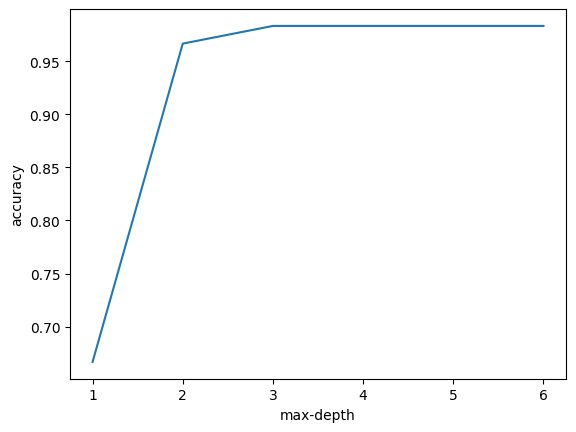

In [78]:
plt.plot(depths, accuracies)
plt.xlabel("max-depth")
plt.ylabel("accuracy")

Best depth:

In [79]:
clf = tree.DecisionTreeClassifier(criterion='gini', max_depth= 3, random_state=1)

# Train the classifier
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

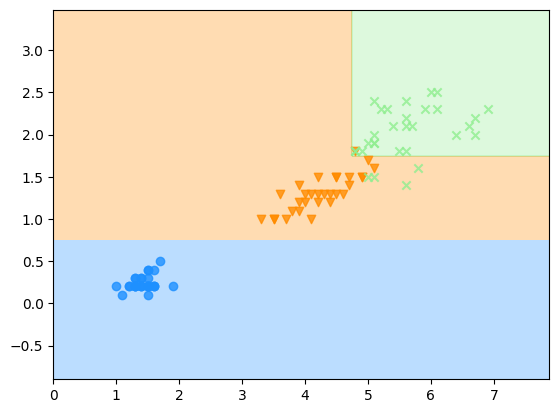

In [80]:
plot_decisions_2d(np.array(X_1_train),np.array(y_1_train),clf)